In [1]:
import pandas as pd 
import  numpy as np
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates
fmt = mdates.DateFormatter('%d-%b\n%Y')
from datetime import datetime 

In [2]:

def date_cleanup(df, dt_cols):
    '''
    Standardize column data and discard those without notification and/or first symptoms date.
    :param df: notifications data frame
    :param dt_cols: list of data columns
    :return: df: standardized data frame
    '''

    # Filter by notification date
    df = df.where(df != -1, None)
    df[dt_cols] = df[dt_cols].where(df[dt_cols] != 10101, None)
    if df.CRITERIO.dtype == 'O':
        df.CRITERIO = df.CRITERIO.where(df.CRITERIO != 'NÃ', None)
    df.dropna(subset=["DT_SIN_PRI", "DT_NOTIFIC"], inplace=True)

    # Convert all date related columns to datetime format
    for col in dt_cols:
        # Convert all date columns to datetime format. Output will have the format YYYY-MM-DD
        dtformat = '%Y%m%d'
        if sum(~pd.isnull(df[col])) > 0:
            sample = df.loc[~pd.isnull(df[col]), col].values[0]
            if isinstance(sample, str):
                if 'T' in sample:
                    df[col] = pd.to_datetime(df[col].str[:10], errors='coerce', format='%Y-%m-%d')
                else:
                    dtsep = '-'
                    if '/' in sample:
                        dtsep = '/'
                    dttest = pd.DataFrame(list(
                        df.loc[~pd.isnull(df[col]), col].str.split(dtsep)
                    ))
                    maxvals = [int(dttest[i].max()) for i in range(3)]
                    del dttest
                    yearpos = maxvals.index(max(maxvals))
                    if yearpos == 2:
                        if maxvals[1] > 12:
                            dtformat = '%m' + dtsep + '%d' + dtsep + '%Y'
                        else:
                            dtformat = '%d' + dtsep + '%m' + dtsep + '%Y'
                    else:
                        dtformat = '%Y' + dtsep + '%m' + dtsep + '%d'
                    df[col] = pd.to_datetime(df[col], errors='coerce', format=dtformat)
            else:
                df[col] = pd.to_datetime(df[col], errors='coerce', format=dtformat)
        else:
            df[col] = pd.to_datetime(df[col])
    # Discard those neither hospitalized nor deceased. For cases from 2009, keep all:
    df = df[(df.DT_SIN_PRI.apply(lambda x: x.year) == 2009) | (df.HOSPITAL == 1) | (df.EVOLUCAO == 2)]

    return df

In [3]:
filename = 'dados/INFLUD_cwb.csv'
cols = {   'DT_DIGITA':object ,
           'DT_NOTIFIC':object ,
           'DT_SIN_PRI':object ,
           'SG_UF_NOT':str,
           'ID_MUNICIP':str,
           'ID_REGIONA':str, 
           'CO_MUN_NOT':float,
           'CS_SEXO':str,
           'DT_NASC':object,
           'NU_IDADE_N':int,
           'TP_IDADE':float,
           'VACINA':float,
           'CLASSI_FIN':float, 
           'EVOLUCAO':float,
           'DT_EVOLUCA':object,
           'CRITERIO': float, 
           'HOSPITAL': float}  

df = pd.read_csv(filename, usecols = cols.keys(), dtype = cols)
#df = pd.read_csv(filename, low_memory = False)
df

,DT_NOTIFIC,DT_SIN_PRI,SG_UF_NOT,ID_REGIONA,ID_MUNICIP,CO_MUN_NOT,CS_SEXO,DT_NASC,NU_IDADE_N,TP_IDADE,VACINA,HOSPITAL,CLASSI_FIN,CRITERIO,EVOLUCAO,DT_EVOLUCA,DT_DIGITA
0,07/01/2022,05/01/2022,PR,02RS METROPOLITANA,CURITIBA,410690.0,M,08/08/1949,72,3.0,9.0,1.0,5.0,1.0,1.0,25/01/2022,07/01/2022
1,10/01/2022,06/01/2022,PR,02RS METROPOLITANA,CURITIBA,410690.0,M,01/08/1943,78,3.0,NaN,1.0,1.0,1.0,1.0,17/01/2022,10/01/2022
2,10/01/2022,05/01/2022,PR,02RS METROPOLITANA,CURITIBA,410690.0,M,06/02/1936,85,3.0,9.0,1.0,2.0,1.0,1.0,11/01/2022,10/01/2022
3,12/01/2022,09/01/2022,PR,02RS METROPOLITANA,CURITIBA,410690.0,M,05/10/2013,8,3.0,NaN,1.0,2.0,1.0,1.0,24/01/2022,17/01/2022
4,17/01/2022,10/01/2022,PR,02RS METROPOLITANA,CURITIBA,410690.0,M,22/08/2021,5,2.0,NaN,1.0,2.0,1.0,1.0,30/01/2022,18/01/2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103498,10/01/2020,15/12/2019,PR,02RS METROPOLITANA,CURITIBA,410690.0,F,10/10/2019,2,2.0,2.0,1.0,2.0,1.0,1.0,10/01/2020,14/01/2020
103499,10/01/2020,25/12/2019,PR,02RS METROPOLITANA,CURITIBA,410690.0,M,15/10/2019,2,2.0,9.0,1.0,4.0,3.0,1.0,12/01/2020,14/01/2020
103500,12/12/2019,09/12/2019,PR,02RS METROPOLITANA,SAO JOSE DOS PINHAIS,412550.0,M,02/08/1978,41,3.0,2.0,1.0,4.0,1.0,2.0,21/12/2019,28/01/2020
103501,25/11/2019,19/11/2019,PR,02RS METROPOLITANA,CURITIBA,410690.0,M,08/04/2019,7,2.0,2.0,1.0,4.0,3.0,1.0,26/11/2019,30/01/2020


In [4]:
def fx_et(df, ini, fin, age_col, name_col = 'fx_et'):
    """
    This function create a column called {name_col} in a dataset {df} that classifies the {age_col} ages
    according to some intervals. The beggining and end of the intervals should be provided in the 
    {ini} and {fin} lists. 

    Parameters
    ----------
    df : pd.DataFrame
        
    ini: list
        list with the initial values that will be used to create the intervals to classify the age column
            
    end: list
        list with the final values that will be used to create the intervals to classify the age column
            
    age_col: str
        Name of the age column
            
    name_col: str
        Name that will be used to save the age group computed. 

    Returns
    -------
    pd.DataFrame
        
    The return is the dataframe {df} with a new column called {name_col} that store the age groups computed.
    
    """
    
    faixa_etaria = {f'[{i},{f})':(i,f) for i,f in zip(ini,fin)}

    labels = list(faixa_etaria.keys())
    # lims = list(faixa_etaria.values())
    
    df[name_col] = [labels[i-1] for i in np.digitize(df[age_col].astype('int'),bins=ini)] 
    
    return df 

In [5]:
dt_cols = ['DT_NOTIFIC', 'DT_SIN_PRI', 'DT_EVOLUCA', 'DT_DIGITA', 'DT_NASC']
df_t = date_cleanup(df, dt_cols)

Inicialmente vamos assumir que a idade fornecida em 'NU_IDADE_N' está correta. Posteriormente podemos aplicar um script de verificação para verificar 'NU_IDADE_N' e a diferença entre 'DT_NASC' e 'DT_NOTIFIC'. No entanto, ao fazer essa verificação seria necessário adotar um valor como mais confiável, já que podemos ter erros no preenchimento de 'DT_NASC' e 'DT_NOTIFIC' também, assim eu deveria discutir com o Flávio qual a opinião dele sobre isso. 

In [6]:
print('Idade em semanas')
print('Valor mínimo:',df_t[df_t['TP_IDADE']==1.0]['NU_IDADE_N'].min() )
print('Valor máximo:', df_t[df_t['TP_IDADE']==1.0]['NU_IDADE_N'].max())

print('\nIdade em meses')
print('Valor mínimo:',df_t[df_t['TP_IDADE']==2.0]['NU_IDADE_N'].min() )
print('Valor máximo:', df_t[df_t['TP_IDADE']==2.0]['NU_IDADE_N'].max())

print('\nIdade em anos')
print('Valor mínimo:',df_t[df_t['TP_IDADE']==3.0]['NU_IDADE_N'].min() )
print('Valor máximo:', df_t[df_t['TP_IDADE']==3.0]['NU_IDADE_N'].max())

Idade em semanas
Valor mínimo: 0
Valor máximo: 30

Idade em meses
Valor mínimo: -2
Valor máximo: 16

Idade em anos
Valor mínimo: 0
Valor máximo: 108


In [7]:
## transformando as idades me meses e dias em anos: 
df_t.loc[df_t['TP_IDADE']==2.0, 'NU_IDADE_N'] = 0 
df_t.loc[df_t['TP_IDADE']==1.0, 'NU_IDADE_N'] = 0

In [8]:
print('Idade em semanas')
print('Valor mínimo:',df_t[df_t['TP_IDADE']==1.0]['NU_IDADE_N'].min() )
print('Valor máximo:', df_t[df_t['TP_IDADE']==1.0]['NU_IDADE_N'].max())

print('\nIdade em meses')
print('Valor mínimo:',df_t[df_t['TP_IDADE']==2.0]['NU_IDADE_N'].min() )
print('Valor máximo:', df_t[df_t['TP_IDADE']==2.0]['NU_IDADE_N'].max())

Idade em semanas
Valor mínimo: 0
Valor máximo: 0

Idade em meses
Valor mínimo: 0
Valor máximo: 0


In [9]:
ini = [0,20,60,80]
fin = [20,60,80,120]

df_t = fx_et(df_t, ini, fin, age_col = 'NU_IDADE_N', name_col = 'FX_ET') 

df_t

,DT_NOTIFIC,DT_SIN_PRI,SG_UF_NOT,ID_REGIONA,ID_MUNICIP,CO_MUN_NOT,CS_SEXO,DT_NASC,NU_IDADE_N,TP_IDADE,VACINA,HOSPITAL,CLASSI_FIN,CRITERIO,EVOLUCAO,DT_EVOLUCA,DT_DIGITA,FX_ET
0,2022-01-07,2022-01-05,PR,02RS METROPOLITANA,CURITIBA,410690.0,M,1949-08-08,72,3.0,9.0,1.0,5.0,1.0,1.0,2022-01-25,2022-01-07,"[60,80)"
1,2022-01-10,2022-01-06,PR,02RS METROPOLITANA,CURITIBA,410690.0,M,1943-08-01,78,3.0,NaN,1.0,1.0,1.0,1.0,2022-01-17,2022-01-10,"[60,80)"
2,2022-01-10,2022-01-05,PR,02RS METROPOLITANA,CURITIBA,410690.0,M,1936-02-06,85,3.0,9.0,1.0,2.0,1.0,1.0,2022-01-11,2022-01-10,"[80,120)"
3,2022-01-12,2022-01-09,PR,02RS METROPOLITANA,CURITIBA,410690.0,M,2013-10-05,8,3.0,NaN,1.0,2.0,1.0,1.0,2022-01-24,2022-01-17,"[0,20)"
4,2022-01-17,2022-01-10,PR,02RS METROPOLITANA,CURITIBA,410690.0,M,2021-08-22,0,2.0,NaN,1.0,2.0,1.0,1.0,2022-01-30,2022-01-18,"[0,20)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103498,2020-01-10,2019-12-15,PR,02RS METROPOLITANA,CURITIBA,410690.0,F,2019-10-10,0,2.0,2.0,1.0,2.0,1.0,1.0,2020-01-10,2020-01-14,"[0,20)"
103499,2020-01-10,2019-12-25,PR,02RS METROPOLITANA,CURITIBA,410690.0,M,2019-10-15,0,2.0,9.0,1.0,4.0,3.0,1.0,2020-01-12,2020-01-14,"[0,20)"
103500,2019-12-12,2019-12-09,PR,02RS METROPOLITANA,SAO JOSE DOS PINHAIS,412550.0,M,1978-08-02,41,3.0,2.0,1.0,4.0,1.0,2.0,2019-12-21,2020-01-28,"[20,60)"
103501,2019-11-25,2019-11-19,PR,02RS METROPOLITANA,CURITIBA,410690.0,M,2019-04-08,0,2.0,2.0,1.0,4.0,3.0,1.0,2019-11-26,2020-01-30,"[0,20)"


Inicialmente vamos utilizar as seguintes colunas do dataframe: 
* 'DT_DIGITA': Data de inclusão do registro no sistema; 
* 'DT_NOTIFIC': Data de notificação;
* 'DT_SIN_PRI': Data de primeiros sintomas; 
* 'SG_UF_NOT': Estado onde foi realizada a notificação; 
* 'ID_MUNICIP': Nome do município onde foi realizada a notificação;
* 'CO_MUN_NOT': Código IBGE (6 dígitos) do município onde foi realizada a notificação; 
* 'CS_SEXO': Sexo do paciente; 
    - M : Masculino
    - F : Feminino
    - I : Ignorado
* 'DT_NASC': Data de nascimento; 
* 'NU_IDADE_N': Idade do paciente;
* 'TP_IDADE': Tipo de idade preenchida em 'NU_IDADE_N': 
    - 1.0 : Dia
    - 2.0 : Mês
    - 3.0 : Ano
* 'FX_ET': Faixa etaria computada. 
* 'VACINA': Recebe vacina contra gripe na última campanha? 
    - 1.0 : Sim
    - 2.0 : Não 
    - 3.0 : Ignorado
* 'CLASSI_FIN': Classificação final do caso. 
    - 1.0 : SRAG por Influenza
    - 2.0 : SRAG por outro vírus
    - 3.0 : SRAG por outro agende etiológico
    - 4.0 : SRAG não específicado
    - 5.0 : SRAG covid 

* 'CRITERIO': Criterio de encerramento do caso. 
    - 1.0 : Laboratorial
    - 2.0 : Clínico epidemiológico
    - 3.0 : Clínico
    - 4.0 : Clínico de imagem 

* 'HOSPITAL': Houve internação. 
    - 1.0 : Sim
    - 2.0 : Não
    - 9.0 : Ignorado
    
* 'EVOLUCAO': Evolução do caso. 
    - 1.0 : Cura
    - 2.0 : Óbito
    - 3.0 : Óbito por outras causas
    - 9.0 : Ignorado
    
* 'DT_EVOLUCA': Data da alta ou do óbito;

In [10]:
columns = [ 'DT_DIGITA','DT_NOTIFIC','DT_SIN_PRI','SG_UF_NOT','ID_MUNICIP','CO_MUN_NOT',
            'CS_SEXO','DT_NASC','NU_IDADE_N','TP_IDADE','FX_ET',
            'CLASSI_FIN', 'EVOLUCAO', 'DT_EVOLUCA', 'HOSPITAL', 'VACINA', 'CRITERIO'] 

# reorganizando as colunas

df_t = df_t[columns]

df_t

,DT_DIGITA,DT_NOTIFIC,DT_SIN_PRI,SG_UF_NOT,ID_MUNICIP,CO_MUN_NOT,CS_SEXO,DT_NASC,NU_IDADE_N,TP_IDADE,FX_ET,CLASSI_FIN,EVOLUCAO,DT_EVOLUCA,HOSPITAL,VACINA,CRITERIO
0,2022-01-07,2022-01-07,2022-01-05,PR,CURITIBA,410690.0,M,1949-08-08,72,3.0,"[60,80)",5.0,1.0,2022-01-25,1.0,9.0,1.0
1,2022-01-10,2022-01-10,2022-01-06,PR,CURITIBA,410690.0,M,1943-08-01,78,3.0,"[60,80)",1.0,1.0,2022-01-17,1.0,NaN,1.0
2,2022-01-10,2022-01-10,2022-01-05,PR,CURITIBA,410690.0,M,1936-02-06,85,3.0,"[80,120)",2.0,1.0,2022-01-11,1.0,9.0,1.0
3,2022-01-17,2022-01-12,2022-01-09,PR,CURITIBA,410690.0,M,2013-10-05,8,3.0,"[0,20)",2.0,1.0,2022-01-24,1.0,NaN,1.0
4,2022-01-18,2022-01-17,2022-01-10,PR,CURITIBA,410690.0,M,2021-08-22,0,2.0,"[0,20)",2.0,1.0,2022-01-30,1.0,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103498,2020-01-14,2020-01-10,2019-12-15,PR,CURITIBA,410690.0,F,2019-10-10,0,2.0,"[0,20)",2.0,1.0,2020-01-10,1.0,2.0,1.0
103499,2020-01-14,2020-01-10,2019-12-25,PR,CURITIBA,410690.0,M,2019-10-15,0,2.0,"[0,20)",4.0,1.0,2020-01-12,1.0,9.0,3.0
103500,2020-01-28,2019-12-12,2019-12-09,PR,SAO JOSE DOS PINHAIS,412550.0,M,1978-08-02,41,3.0,"[20,60)",4.0,2.0,2019-12-21,1.0,2.0,1.0
103501,2020-01-30,2019-11-25,2019-11-19,PR,CURITIBA,410690.0,M,2019-04-08,0,2.0,"[0,20)",4.0,1.0,2019-11-26,1.0,2.0,3.0


Verificando a porcentagem de valores nulos em cada coluna do dataframe:

In [11]:
df_t.isnull().sum()/df_t.shape[0]

DT_DIGITA     0.012107
DT_NOTIFIC    0.000000
DT_SIN_PRI    0.000000
SG_UF_NOT     0.000000
ID_MUNICIP    0.000000
CO_MUN_NOT    0.000000
CS_SEXO       0.000000
DT_NASC       0.000175
NU_IDADE_N    0.000000
TP_IDADE      0.000000
FX_ET         0.000000
CLASSI_FIN    0.045456
EVOLUCAO      0.125125
DT_EVOLUCA    0.130669
HOSPITAL      0.000282
VACINA        0.180639
CRITERIO      0.060087
dtype: float64

Verificando a porcentagem dos casos notificado em cada uma das cidades:

In [12]:
df_t['ID_MUNICIP'].value_counts()/df_t.shape[0]

CURITIBA                 0.733595
CAMPO LARGO              0.190940
CAMPINA GRANDE DO SUL    0.028048
ARAUCARIA                0.013786
LAPA                     0.010534
SAO JOSE DOS PINHAIS     0.007311
RIO BRANCO DO SUL        0.006699
ITAPERUCU                0.005262
PIEN                     0.001408
PINHAIS                  0.001379
FAZENDA RIO GRANDE       0.000583
COLOMBO                  0.000291
PIRAQUARA                0.000078
CERRO AZUL               0.000049
QUITANDINHA              0.000019
ALMIRANTE TAMANDARE      0.000010
RIO NEGRO                0.000010
Name: ID_MUNICIP, dtype: float64

Como o SIVEP se baseia em internações, e elas normalmente acontecem nos hospitais maiores acho que não faz muito sentido analisar o comportamento individual de cada uma das cidades da região metropolitana. Acredito que essa análise faça mais sentido com os dados do ESUS. 

In [13]:
df_t

,DT_DIGITA,DT_NOTIFIC,DT_SIN_PRI,SG_UF_NOT,ID_MUNICIP,CO_MUN_NOT,CS_SEXO,DT_NASC,NU_IDADE_N,TP_IDADE,FX_ET,CLASSI_FIN,EVOLUCAO,DT_EVOLUCA,HOSPITAL,VACINA,CRITERIO
0,2022-01-07,2022-01-07,2022-01-05,PR,CURITIBA,410690.0,M,1949-08-08,72,3.0,"[60,80)",5.0,1.0,2022-01-25,1.0,9.0,1.0
1,2022-01-10,2022-01-10,2022-01-06,PR,CURITIBA,410690.0,M,1943-08-01,78,3.0,"[60,80)",1.0,1.0,2022-01-17,1.0,NaN,1.0
2,2022-01-10,2022-01-10,2022-01-05,PR,CURITIBA,410690.0,M,1936-02-06,85,3.0,"[80,120)",2.0,1.0,2022-01-11,1.0,9.0,1.0
3,2022-01-17,2022-01-12,2022-01-09,PR,CURITIBA,410690.0,M,2013-10-05,8,3.0,"[0,20)",2.0,1.0,2022-01-24,1.0,NaN,1.0
4,2022-01-18,2022-01-17,2022-01-10,PR,CURITIBA,410690.0,M,2021-08-22,0,2.0,"[0,20)",2.0,1.0,2022-01-30,1.0,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103498,2020-01-14,2020-01-10,2019-12-15,PR,CURITIBA,410690.0,F,2019-10-10,0,2.0,"[0,20)",2.0,1.0,2020-01-10,1.0,2.0,1.0
103499,2020-01-14,2020-01-10,2019-12-25,PR,CURITIBA,410690.0,M,2019-10-15,0,2.0,"[0,20)",4.0,1.0,2020-01-12,1.0,9.0,3.0
103500,2020-01-28,2019-12-12,2019-12-09,PR,SAO JOSE DOS PINHAIS,412550.0,M,1978-08-02,41,3.0,"[20,60)",4.0,2.0,2019-12-21,1.0,2.0,1.0
103501,2020-01-30,2019-11-25,2019-11-19,PR,CURITIBA,410690.0,M,2019-04-08,0,2.0,"[0,20)",4.0,1.0,2019-11-26,1.0,2.0,3.0


In [14]:
# função para gerar a curva de hospitalizações  por faixa etária 
def make_df_hosp_age(df, faixa_etaria, media = False):
    
    df_hosp = df.copy()

    df_hosp.set_index('DT_SIN_PRI', inplace = True)

    df_hosp.index = pd.to_datetime(df_hosp.index)

    df_hosp = df_hosp.loc[ df_hosp.FX_ET == faixa_etaria]
    
    df_hosp = df_hosp.resample('D').count()
    
    df_hosp = df_hosp[['SG_UF_NOT']]
    
    df_hosp = df_hosp.rename(columns = {'SG_UF_NOT': 'daily_hosp'})
    
    if media == True:
        
        df_hosp = df_hosp.rolling(window = 7).mean()
        
        df_hosp = df_hosp.dropna()
    
    return df_hosp


# função para gerar a curva de óbitos por faixa etária 
def make_df_deaths_age(df, faixa_etaria, media = False):
    
    df_deaths = df.copy()
    
    df_deaths = df_deaths.dropna(subset = ['DT_EVOLUCA'])
    
    df_deaths = df_deaths.loc[df_deaths.EVOLUCAO == 2.0]

    df_deaths.set_index('DT_EVOLUCA', inplace = True)

    df_deaths.index = pd.to_datetime(df_deaths.index)

    df_deaths = df_deaths.loc[ df_deaths.FX_ET == faixa_etaria]
    
    df_deaths = df_deaths.resample('D').count()
    
    df_deaths = df_deaths[['SG_UF_NOT']]
    
    df_deaths = df_deaths.rename(columns = {'SG_UF_NOT': 'daily_deaths'})
    
    if media == True:
        
        df_deaths = df_deaths.rolling(window = 7).mean()
        
        df_deaths = df_deaths.dropna()
    
    return df_deaths


In [15]:
df_t.FX_ET.unique()

array(['[60,80)', '[80,120)', '[0,20)', '[20,60)'], dtype=object)

Na análise, vamos remover os casos de SRAG de causa desconhecida ou relacionados a covid. 

In [16]:
df_s = df_t[ (df_t['CLASSI_FIN'] != 4.0) & (df_t['CLASSI_FIN'] != 5.0) ]

df_s

,DT_DIGITA,DT_NOTIFIC,DT_SIN_PRI,SG_UF_NOT,ID_MUNICIP,CO_MUN_NOT,CS_SEXO,DT_NASC,NU_IDADE_N,TP_IDADE,FX_ET,CLASSI_FIN,EVOLUCAO,DT_EVOLUCA,HOSPITAL,VACINA,CRITERIO
1,2022-01-10,2022-01-10,2022-01-06,PR,CURITIBA,410690.0,M,1943-08-01,78,3.0,"[60,80)",1.0,1.0,2022-01-17,1.0,NaN,1.0
2,2022-01-10,2022-01-10,2022-01-05,PR,CURITIBA,410690.0,M,1936-02-06,85,3.0,"[80,120)",2.0,1.0,2022-01-11,1.0,9.0,1.0
3,2022-01-17,2022-01-12,2022-01-09,PR,CURITIBA,410690.0,M,2013-10-05,8,3.0,"[0,20)",2.0,1.0,2022-01-24,1.0,NaN,1.0
4,2022-01-18,2022-01-17,2022-01-10,PR,CURITIBA,410690.0,M,2021-08-22,0,2.0,"[0,20)",2.0,1.0,2022-01-30,1.0,NaN,1.0
21,2022-02-22,2022-02-22,2022-02-20,PR,CURITIBA,410690.0,F,1988-02-20,34,3.0,"[20,60)",2.0,1.0,2022-02-24,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103482,2020-01-09,2019-12-27,2019-12-24,PR,CURITIBA,410690.0,F,2012-10-02,7,3.0,"[0,20)",2.0,1.0,2019-12-30,1.0,1.0,1.0
103489,2020-01-09,2019-12-27,2019-12-24,PR,CURITIBA,410690.0,M,2014-12-28,4,3.0,"[0,20)",2.0,1.0,2020-01-20,1.0,1.0,1.0
103493,2020-01-09,2019-12-27,2019-12-26,PR,CURITIBA,410690.0,F,2019-05-16,0,2.0,"[0,20)",2.0,1.0,2020-01-06,1.0,9.0,1.0
103496,2020-01-09,2020-01-03,2019-12-07,PR,CURITIBA,410690.0,F,2019-11-27,0,2.0,"[0,20)",2.0,1.0,2020-01-27,1.0,2.0,1.0


Abaixo vamos criar os dataframes com as hospitalizações diárias e plotar o resultado em um gráfico. As linhas pretas tracejadas representam a separação entre os anos. 

In [17]:
df_0  = make_df_hosp_age(df_s, '[0,20)', media = True)

df_20 = make_df_hosp_age(df_s, '[20,60)', media = True)

df_60 = make_df_hosp_age(df_s, '[60,80)', media = True)

df_80 = make_df_hosp_age(df_s, '[80,120)', media = True)

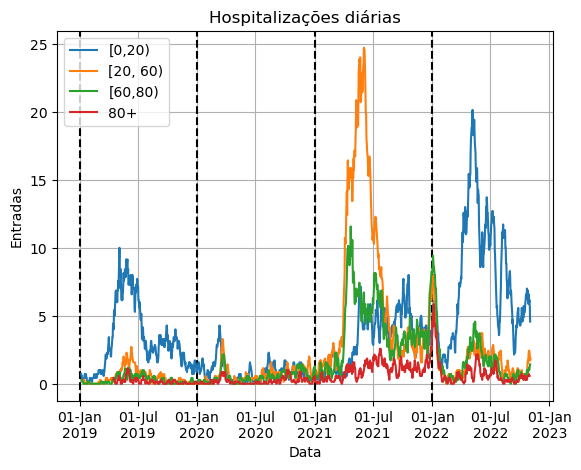

In [18]:
fig, ax = plt.subplots()

ax.axvline(datetime(2019, 1, 1), color = 'black', ls = '--')
ax.axvline(datetime(2020, 1, 1), color = 'black', ls = '--')
ax.axvline(datetime(2021, 1, 1), color = 'black', ls = '--')
ax.axvline(datetime(2022, 1, 1), color = 'black', ls = '--')
ax.plot(df_0, label = '[0,20)')

ax.plot(df_20, label = '[20, 60)')

ax.plot(df_60, label = '[60,80)')

ax.plot(df_80, label = '80+')

ax.set_title('Hospitalizações diárias')

ax.xaxis.set_major_formatter(fmt)

ax.set_xlabel('Data')

ax.set_ylabel('Entradas') 

plt.legend()

plt.grid()

plt.show()

Vamos refazer o gráfico acima para cada um das faixas etárias consideradas: 

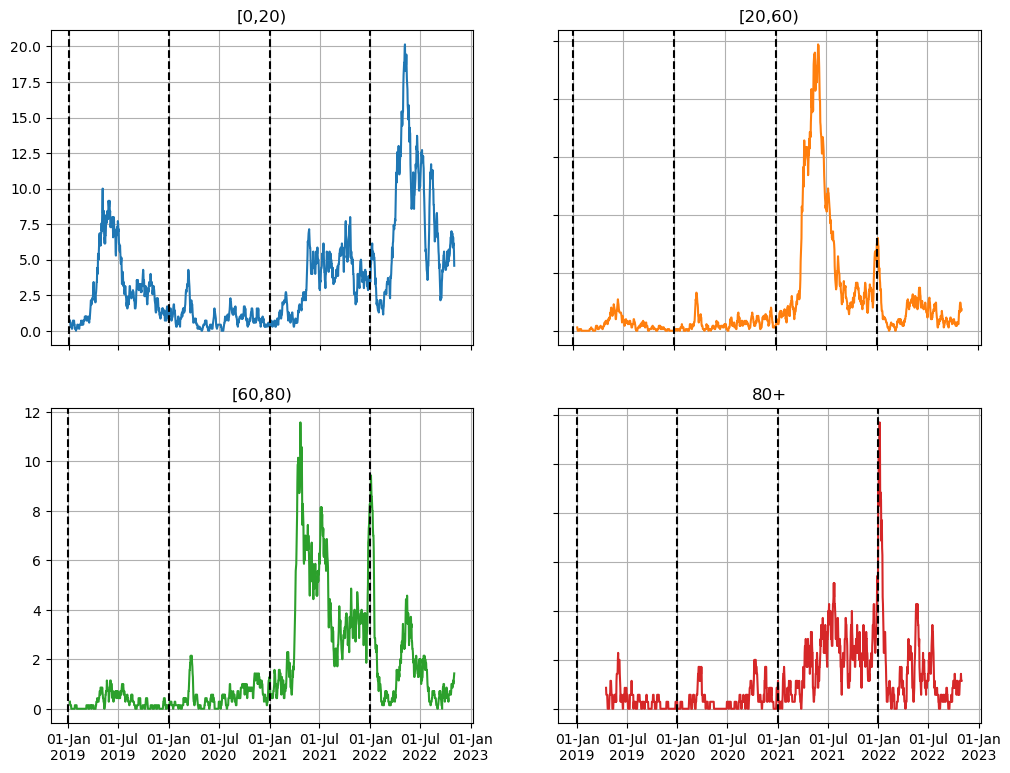

In [19]:
fig, axs = plt.subplots(2, 2, figsize = (12,9))
axs[0, 0].plot(df_0)
axs[0, 0].set_title('[0,20)')
axs[0, 1].plot(df_20, 'tab:orange')
axs[0, 1].set_title('[20,60)')
axs[1, 0].plot(df_60, 'tab:green')
axs[1, 0].set_title('[60,80)')
axs[1, 1].plot(df_80, 'tab:red')
axs[1, 1].set_title('80+')

for ax in axs.flat:
    
    ax.axvline(datetime(2019, 1, 1), color = 'black', ls = '--')
    ax.axvline(datetime(2020, 1, 1), color = 'black', ls = '--')
    ax.axvline(datetime(2021, 1, 1), color = 'black', ls = '--')
    ax.axvline(datetime(2022, 1, 1), color = 'black', ls = '--')
    ax.grid()
    ax.xaxis.set_major_formatter(fmt)

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

Utilizando os dados de população vamos refazer os gráficos acima considerando a incidência por 100 mil habitantes. 

In [20]:
df_pop = pd.read_csv('dados/pop_reg_metr_cwb.csv')

df_pop

,Unnamed: 0,local,ano,"[0,20)","[20,60)","[60,80)",80+
0,0,02RS METROPOLITANA,2019,1.015429e+06,2.157186e+06,424855.85218,63858.352732
1,0,02RS METROPOLITANA,2020,1.014662e+06,2.175205e+06,444204.55387,67002.980058
2,0,02RS METROPOLITANA,2021,1.013938e+06,2.193536e+06,463148.60850,70561.541043
3,0,02RS METROPOLITANA,2022,1.015550e+06,2.207694e+06,482682.84391,74258.546489


In [21]:
inc_0 = df_0
inc_20 = df_20
inc_60 = df_60
inc_80 = df_80

for i in [2019, 2020, 2021, 2022]:
    
    ini = f'{i}-01-01'
    end = f'{i+1}-01-01'

    inc_0.loc[ (inc_0.index >= ini) & (inc_0.index < end), 'daily_hosp'] = 1e5*(inc_0.loc[ (inc_0.index >= ini) & (inc_0.index < end)]['daily_hosp']/df_pop[df_pop.ano == i]['[0,20)'].values[0])

    inc_20.loc[ (inc_20.index >= ini) & (inc_20.index < end), 'daily_hosp'] = 1e5*(inc_20.loc[ (inc_20.index >= ini) & (inc_20.index < end)]['daily_hosp']/df_pop[df_pop.ano == i]['[20,60)'].values[0])

    inc_60.loc[ (inc_60.index >= ini) & (inc_60.index < end), 'daily_hosp'] = 1e5*(inc_60.loc[ (inc_60.index >= ini) & (inc_60.index < end)]['daily_hosp']/df_pop[df_pop.ano == i]['[60,80)'].values[0])

    inc_80.loc[ (inc_80.index >= ini) & (inc_80.index < end), 'daily_hosp'] = 1e5*(inc_80.loc[ (inc_80.index >= ini) & (inc_80.index < end)]['daily_hosp']/df_pop[df_pop.ano == i]['80+'].values[0])


inc_0


,daily_hosp
DT_SIN_PRI,
2019-01-06,0.070343
2019-01-07,0.056275
2019-01-08,0.056275
2019-01-09,0.028137
2019-01-10,0.028137
...,...
2022-10-29,0.647081
2022-10-30,0.590813
2022-10-31,0.604880


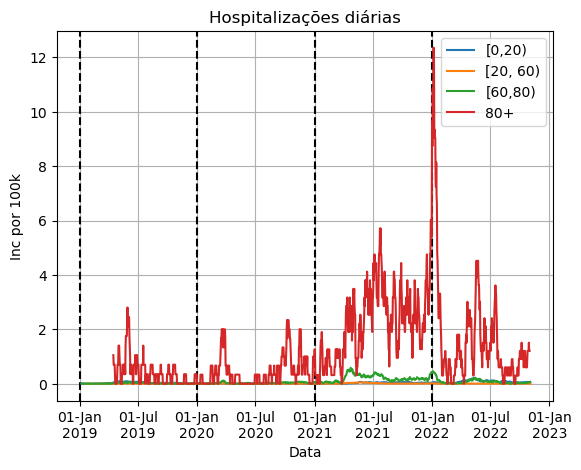

In [22]:
fig, ax = plt.subplots()

ax.axvline(datetime(2019, 1, 1), color = 'black', ls = '--')
ax.axvline(datetime(2020, 1, 1), color = 'black', ls = '--')
ax.axvline(datetime(2021, 1, 1), color = 'black', ls = '--')
ax.axvline(datetime(2022, 1, 1), color = 'black', ls = '--')
ax.plot( 1e5*(df_0/df_pop['[0,20)'][0]), label = '[0,20)')

ax.plot( 1e5*(df_20/df_pop['[20,60)'][0]), label = '[20, 60)')

ax.plot( 1e5*(df_60/df_pop['[60,80)'][0]), label = '[60,80)')

ax.plot( 1e5*(df_80/df_pop['80+'][0]), label = '80+')

ax.xaxis.set_major_formatter(fmt)

ax.set_title('Hospitalizações diárias')

ax.set_xlabel('Data')

ax.set_ylabel('Inc por 100k') 

plt.legend()

plt.grid()

plt.show()

Olhando cada umas das faixas etárias separadamente: 

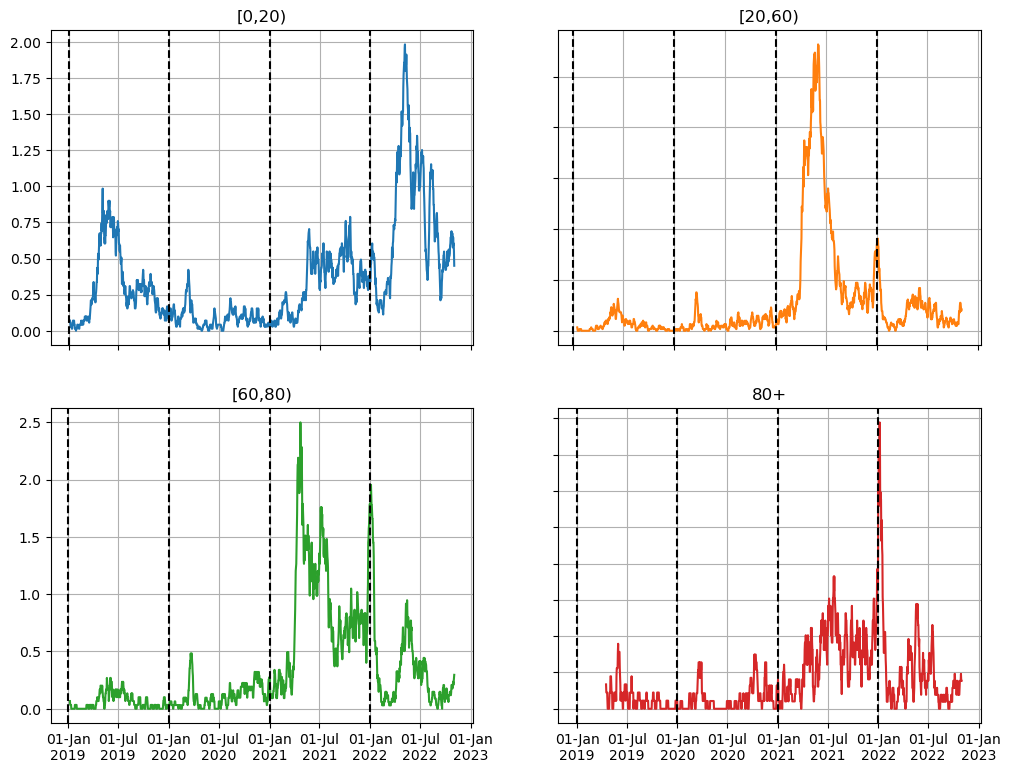

In [23]:
fig, axs = plt.subplots(2, 2, figsize = (12,9))
axs[0, 0].plot(inc_0)
axs[0, 0].set_title('[0,20)')
axs[0, 1].plot(inc_20, 'tab:orange')
axs[0, 1].set_title('[20,60)')
axs[1, 0].plot(inc_60, 'tab:green')
axs[1, 0].set_title('[60,80)')
axs[1, 1].plot(inc_80, 'tab:red')
axs[1, 1].set_title('80+')

for ax in axs.flat:
    
    ax.axvline(datetime(2019, 1, 1), color = 'black', ls = '--')
    ax.axvline(datetime(2020, 1, 1), color = 'black', ls = '--')
    ax.axvline(datetime(2021, 1, 1), color = 'black', ls = '--')
    ax.axvline(datetime(2022, 1, 1), color = 'black', ls = '--')
    ax.grid()
    ax.xaxis.set_major_formatter(fmt)

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

Vamos plotar também um gráfico com a seguinte curva: 

$$ \cfrac{\text{Incidência por faixa etária}}{ \text{Incidência total} } $$



In [24]:
cases_t = df_0 + df_20 + df_60 + df_80 
pop_t = df_pop['[0,20)'][0] + df_pop['[20,60)'][0] + df_pop['[60,80)'][0] + df_pop['80+'][0] 
inc_t = 1e5*(cases_t/pop_t) 

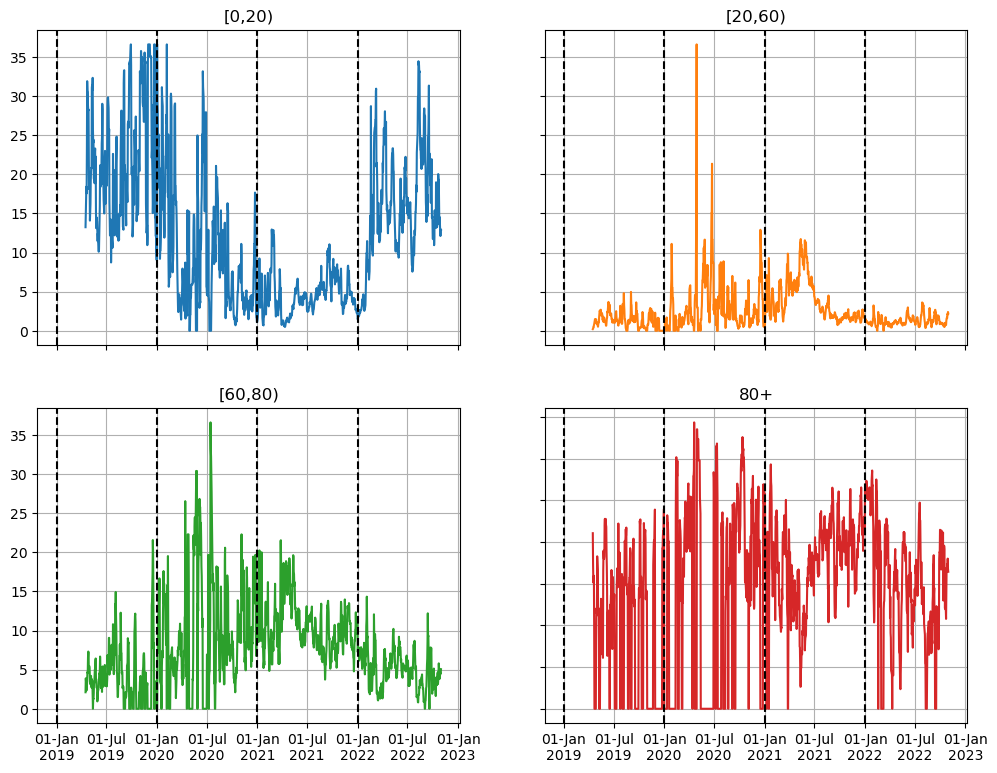

In [25]:
fig, axs = plt.subplots(2, 2, figsize = (12,9))
axs[0, 0].plot(inc_0/inc_t)
axs[0, 0].set_title('[0,20)')
axs[0, 1].plot(inc_20/inc_t, 'tab:orange')
axs[0, 1].set_title('[20,60)')
axs[1, 0].plot(inc_60/inc_t, 'tab:green')
axs[1, 0].set_title('[60,80)')
axs[1, 1].plot(inc_80/inc_t, 'tab:red')
axs[1, 1].set_title('80+')

for ax in axs.flat:
    
    ax.axvline(datetime(2019, 1, 1), color = 'black', ls = '--')
    ax.axvline(datetime(2020, 1, 1), color = 'black', ls = '--')
    ax.axvline(datetime(2021, 1, 1), color = 'black', ls = '--')
    ax.axvline(datetime(2022, 1, 1), color = 'black', ls = '--')
    ax.grid()
    ax.xaxis.set_major_formatter(fmt)

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()